In [1]:
import pickle
from data.logits_of_real_data.unpickle_probs import unpickle_probs
import torch
import torch.nn.functional as F
import logging
logging.basicConfig(level=logging.INFO)
import matplotlib.pyplot as plt
from metrics.TCE_BPM import visual_TCE_BPM
from metrics.TCE_BPM import visual_fitting_effect
from metrics.metrics_comparison import visual_error_comparation

In [3]:
# Load data
FILE_PATH = r'data/logits_of_real_data/resnet110_c10_logits.p'
_, (y_probs_test, y_test) = unpickle_probs(FILE_PATH, False)
y_probs_test = torch.from_numpy(y_probs_test)
y_test = torch.from_numpy(y_test)
y_test = y_test.squeeze(dim=1)
softmaxes = F.softmax(y_probs_test, dim=1)
confidences, predictions = torch.max(softmaxes, 1)
hits = predictions.eq(y_test)
confidences,resort_index = torch.sort(confidences)
hits = hits[resort_index]
confidences = confidences.numpy()
hits = hits.numpy()
logging.info("Loading data successfully!")

INFO:root:Loading data successfully!


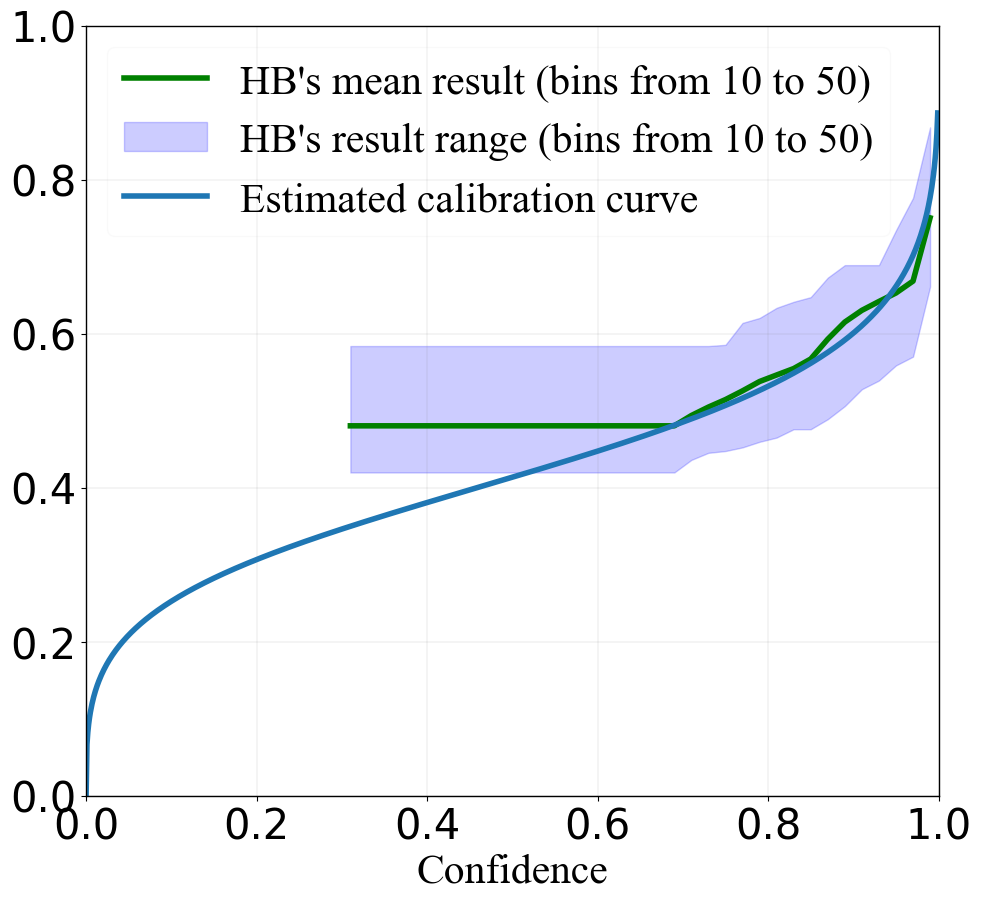

In [4]:
#(a) of Figure 1
fig = plt.figure(figsize=(11, 10))
visual_TCE_BPM(confidences,hits)
plt.show()

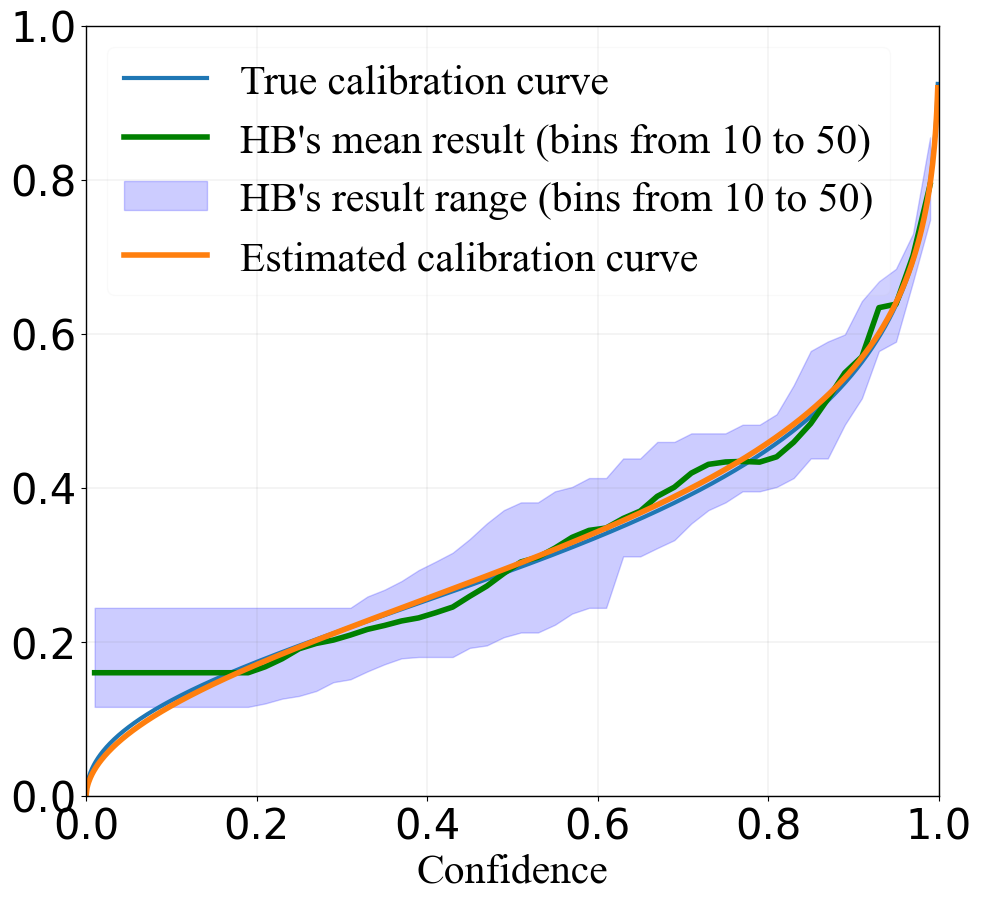

In [5]:
#(b) of Figure 1
visual_fitting_effect()

INFO:root:The 0-th run is completed, with a total of 100 runs.
INFO:root:The 1-th run is completed, with a total of 100 runs.
INFO:root:The 2-th run is completed, with a total of 100 runs.
INFO:root:The 3-th run is completed, with a total of 100 runs.
INFO:root:The 4-th run is completed, with a total of 100 runs.
INFO:root:The 5-th run is completed, with a total of 100 runs.
INFO:root:The 6-th run is completed, with a total of 100 runs.
INFO:root:The 7-th run is completed, with a total of 100 runs.
INFO:root:The 8-th run is completed, with a total of 100 runs.
INFO:root:The 9-th run is completed, with a total of 100 runs.
INFO:root:The 10-th run is completed, with a total of 100 runs.
INFO:root:The 11-th run is completed, with a total of 100 runs.
INFO:root:The 12-th run is completed, with a total of 100 runs.
INFO:root:The 13-th run is completed, with a total of 100 runs.
INFO:root:The 14-th run is completed, with a total of 100 runs.
INFO:root:The 15-th run is completed, with a total

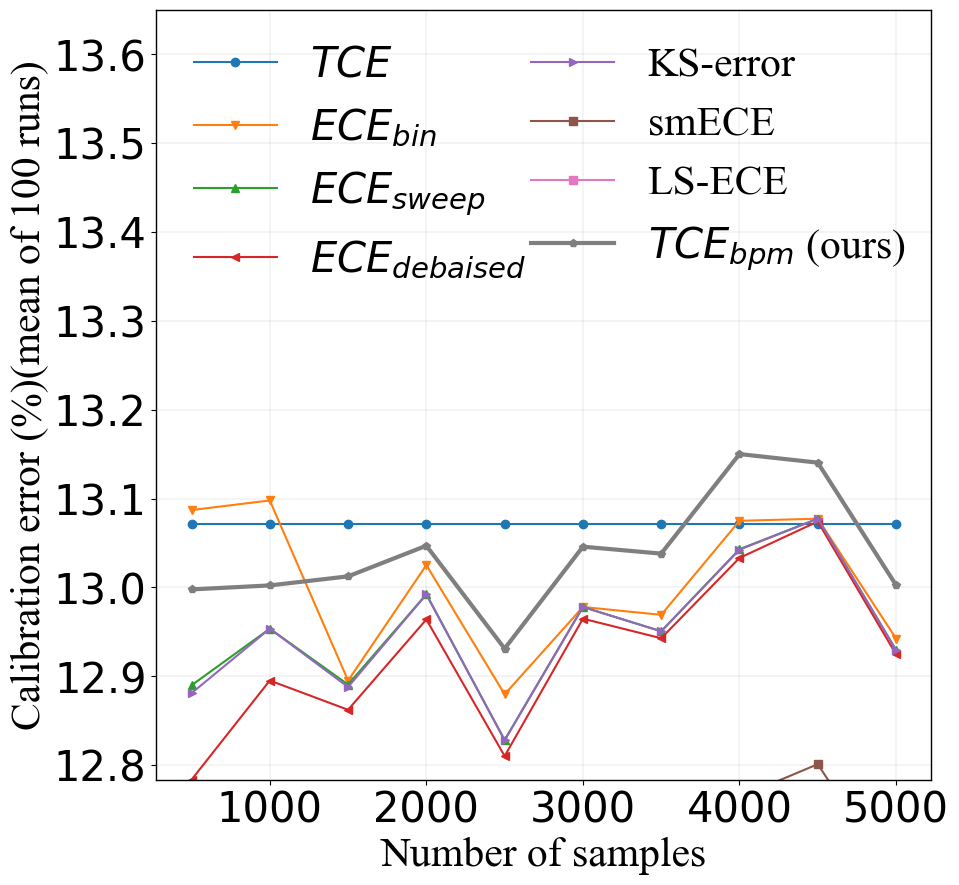

In [5]:
#(c) of Figure 1
visual_error_comparation()